In [110]:
using SparseSensors
using LinearAlgebra
using Gadfly
using DataFrames

In [111]:
r = 11; # Number of basis modes
n = 1000;
x = collect(0.0:1/n:1.0);
basis = VandermondeBasis(x,r);
basis_matrix = vde.Ψ;

In [112]:
X = copy(transpose(basis_matrix));
n_samples,n_features = size(X);

In [113]:
size(X)

(11, 1001)

In [114]:
qr_pivot = QRPivot(X);
fit(qr_pivot);
pivots = qr_pivot.pivots;

In [115]:
#Select the top 15 sensor locations
f = abs.(x.^2 .- 0.5);
selected_sensors = get_sensors(pivots,15);
x_sensed = x[selected_sensors];
y_sensed = f[selected_sensors];

#Ground truth
df_true = DataFrame();
df_true[!,"x_true"] = x
df_true[!,"y_true"] = f

#Sensed
df = DataFrame()
df[!,"x_sensed"] = x_sensed;
df[!,"y_sensed"] = y_sensed;

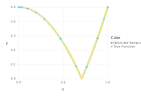

In [116]:
p1 = plot(df,
    layer(x=:x_sensed,y=:y_sensed,color=["Optimized Sensors"]),
    layer(df_true,x=:x_true,y=:y_true,Geom.line,Geom.point,color=["True Function"]),
    Guide.xlabel("x"),Guide.ylabel("y"))